# Project (final assessment of STK 353)

In [56]:
# imports
import Datasets
from Datasets import Source_Code
import pandas as pd
import re
from nltk.corpus import stopwords
import string # for translating strings to not have any punctuation
import nltk # for lemmatization


# get datasets from source code
Honda_accord_2008_data = Source_Code.send_honda_accord_2008_data()
Honda_accord_2009_data = Source_Code.send_honda_accord_2009_data()
Hyundai_sonata_2009_data = Source_Code.send_hyundai_sonata_2008_data()
Toyota_corolla_2009_data = Source_Code.send_toyota_corolla_2009_data() 

def read_file(filename):
    with open(filename, 'r', encoding='ISO-8859-1') as file:
        text = file.read()
    return text


honda_2008_text = read_file('Datasets/2008_honda_accord')
honda_2009_text = read_file('Datasets/2009_honda_accord')
hyundai_2009_text = read_file('Datasets/2009_hyundai_sonata')
toyota_2009_text = read_file('Datasets/2009_toyota_corolla')

# You can count the comments based on a delimiter or pattern you know each dataset uses to separate comments.
# For this example, let's assume each comment is separated by a newline character.
honda_2008_reviews = honda_2008_text.split('\n')
honda_2009_reviews = honda_2009_text.split('\n')
hyundai_2009_reviews = hyundai_2009_text.split('\n')
toyota_2009_reviews = toyota_2009_text.split('\n')



#type(Honda_accord_2008_data)
#Toyota_corolla_2009_data.info()


Let's discuss the car datasets `2009_honda_accord`, `2009_hyundai_sonata`, and `2009_toyota_corolla`. These datasets contain customer reviews for three different car models from 2009. 

1. As a stakeholder representing these companies, your objective is to determine which car has acheived the highest customer satisfaction rate among the three.

2. Additionally, you want to investigate whether the satisfaction rate for the Honda Accord has improved from 2008 to 2009. To answer this question, you will also need to analyze the dataset `2008_honda_accord`, which consists of customer reviews for the Honda Accord from the year 2008.

3. In the end, your final goal is to categorize the customer reviews for the Honda Accord (only those of the year 2008) into $k$ meaningful groups.

To answer the above questions, please consider the following points:
- a) Obtain the number of comments given in all four reviews and report the results.
- b) In the cleaning process, using lemmatization rather than stemming is recommended (Why?)
- c) During the cleaning process, you also need to remove numbers and HTML tags e.g. `<DOC>, <TEXT>, <AUTHOR>` and similar elements.
- d)  The first two questions can be solved using sentiment analysis techniques.
- e) Create appropriate `wordcloud`s for each part to visualize the most frequent words in the reviews.
- f) Determine the optimal value of $k$ from the set $\{2, 3, 4, 5\}$ in Question 3.
- g) (_optional_) Feel free to obtain any other relevant outputs, such as evaluation metrics or additional plots.
- h) (_optional_) If you find that the algorithm used in Question 3 does not provide satisfactory performance, you can try incorporating the datasets `2008_honda_accord` and `2009_honda_accord` to cluster the reviews again, aiming for better results.

In [5]:
# a) Obtain the number of comments given in all four reviews and report the results.

# Count the number of occurrences using a regex to count the number of comments
accord_08_comment_count = len(Honda_accord_2008_data['doc'].isna())
accord_09_comment_count =  len(Honda_accord_2009_data['doc'].isna())
sonata_09_comment_count =  len(Hyundai_sonata_2009_data['doc'].isna())
corolla_09_comment_count =  len(Toyota_corolla_2009_data['doc'].isna())


print("THis is the length of all the comments: ", len(Toyota_corolla_2009_data))

#print results
print(accord_08_comment_count, accord_09_comment_count, sonata_09_comment_count, corolla_09_comment_count)


THis is the length of all the comments:  226
540 224 262 226


In [ ]:
#- b) In the cleaning process, using lemmatization rather than stemming is recommended (Why?)

 

In [57]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('stopwords')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Lemmatize and remove stop words
    words = text.split()
    cleaned_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stopwords.words('english')]
    return ' '.join(cleaned_words)

# Apply cleaning to the comments
# For demonstration purposes, I will show the process for the 2008 Honda Accord reviews
honda_2008_reviews = [clean_text(review) for review in honda_2008_reviews]
honda_2009_reviews = [clean_text(review) for review in honda_2009_reviews]
hyundai_2009_reviews = [clean_text(review) for review in hyundai_2009_reviews]
toyota_2009_reviews = [clean_text(review) for review in toyota_2009_reviews]
honda_2008_reviews



['_honda_accord',
 '',
 '',
 '',
 'turned k still pleased. nd set tire week ago. purchasing tires, buy speed rating original. % interstate driving returning - mpg. oil change maintenance minder averaging k intervals. issue probably drive k. brake pad front rear date.',
 '',
 '',
 '',
 '',
 '',
 "i've owned three vehicle prior ' accord. first love malibu, second old alero finally isuzu ascender. enjoyed every vehicle but, problem first year. say honda far reliable. quiet, get good gas mileage look clean inside out. love new body style interior simple pleasure except center dash. overall minimal issue car performs like champ. believe top four car price range. think could made wiser choice vehicle single guy family vehicle matter. best vehicle price!",
 '',
 '',
 '',
 '',
 '',
 'purchased honda accord v due reviews. car worst new car ever bought. shop time coil replacement, time new injector pump, time door dash rattle brake miles. hondas me. dealer great car poor choice!',
 '',
 '',
 '',

In [44]:
# #- c) During the cleaning process, you also need to remove numbers and HTML tags e.g. `<DOC>, <TEXT>, <AUTHOR>` and similar elements.

# STOPWORDS = set(stopwords.words('english'))

# # Step 1: remove the spaces
# def remove_spaces(dataframe):
#     df_sans_spaces = dataframe.applymap(lambda x: x.replace('\n', ''))
#     print(df_sans_spaces)
#     return df_sans_spaces


# # Step 2:  remove the punctuation
# def rm_punctuation(comment_salad_string):
#     comments_word_library = comment_salad_string.split() # split the words into individual strings
#     translator = str.maketrans('', '', string.punctuation) # create a table transaltion table to remove the punctuation
#     sans_punctuation_words = [word.translate(translator) for word in comments_word_library] # Removes the punctuation
#     return sans_punctuation_words


# # Step 3: Remove stopwords
# def remove_numbers_n_words(word_lib):
#     # Define a regular expression pattern to match single digits and 'doc' (case-insensitive)
#     pattern = r'\d\b|\bdoc\b'
    
#     # Use list comprehension to filter out undesired elements
#     filtered_words = [word for word in word_lib if not re.search(pattern, word, re.I)]

#     # Join the filtered words back into a single string or keep as a list
#     filtered_text = ' '.join(filtered_words)    
    
#     return filtered_text.split()


# # Step 4: remove the stopwords
# def rm_stopwords(comment_salad_string_list):
#     # Remove stopwords from the list of words
#     filtered_words = [word for word in comment_salad_string_list if word.lower() not in STOPWORDS]
    
#     # Convert each word to lowercase using list comprehension
#     lowercase_words = [word.lower() for word in filtered_words]  
    
#     return lowercase_words # return list of words


# # Step 5: get remaining clean words
# def get_cleaned_words(dataframe):
#     # send dataframe to remove the empty spaces in the series rows
#     sans_spaces_df = remove_spaces(dataframe)
    
#     #print("omega strng list:", str(sans_spaces_df['doc']))
    
#     # get comments column from dataframe and make it a big string
#     big_string = ''
#     for _, row in sans_spaces_df.iterrows():
#         big_string += ' '.join(row) + ' '
    
#     # remove the punctuation from the string
#     sans_punctuation_comment_string_list = rm_punctuation(big_string)
    
#     # remove the punctuation from the string
#     sans_numbers_words = remove_numbers_n_words(sans_punctuation_comment_string_list)
    
#     # remove the stopwords
#     sans_stopwords_words = rm_stopwords(sans_numbers_words)
    
#     # get cleaned string of words
#     cleaned_comments_string_list = sans_stopwords_words
    
#     return cleaned_comments_string_list # return string of cleaned words
    

# # Step 6: Get resulting output
# clean_words = get_cleaned_words(Honda_accord_2008_data)
# clean_words


                                                   doc
0    Just turned 90K and still pleased. 2nd set of ...
1    I've owned three vehicles prior to my 08' Acco...
2    Purchased a Honda Accord V6 due to the reviews...
3    I leased a 2008 Accord in April 2008 - at 7,00...
4    Overall a pretty nice car but has some model c...
..                                                 ...
535  Not as quiet as a Lexus, but quiet enough. Not...
536  I had been in GM truck leases for over 7 years...
537  This is my 3rd accord that I've owned in the p...
538  Love, love, love my 190hp. Was uncertain about...
539  I have been driving my 2008 Accord V6 for a ye...

[540 rows x 1 columns]


['turned',
 '90k',
 'still',
 'pleased',
 '2nd',
 'set',
 'tires',
 'weeks',
 'ago',
 'purchasing',
 'tires',
 'buy',
 'speed',
 'rating',
 'original',
 'interstate',
 'driving',
 'returning',
 'mpg',
 'oil',
 'change',
 'maintenance',
 'minder',
 'averaging',
 '10k',
 'intervals',
 'issues',
 'probably',
 'drive',
 '200k',
 'brake',
 'pads',
 'front',
 'rear',
 'date',
 'ive',
 'owned',
 'three',
 'vehicles',
 'prior',
 'accord',
 'first',
 'love',
 'malibu',
 'second',
 'olds',
 'alero',
 'finally',
 'isuzu',
 'ascender',
 'enjoyed',
 'every',
 'vehicle',
 'problems',
 'first',
 'year',
 'say',
 'honda',
 'far',
 'reliable',
 'quiet',
 'get',
 'good',
 'gas',
 'mileage',
 'looks',
 'clean',
 'inside',
 'love',
 'new',
 'body',
 'style',
 'interior',
 'simple',
 'pleasure',
 'except',
 'center',
 'dash',
 'overall',
 'minimal',
 'issues',
 'car',
 'performs',
 'like',
 'champ',
 'believe',
 'top',
 'four',
 'cars',
 'price',
 'range',
 'dont',
 'think',
 'could',
 'made',
 'wiser',
 '

In [ ]:
#- d)  The first two questions can be solved using sentiment analysis techniques.

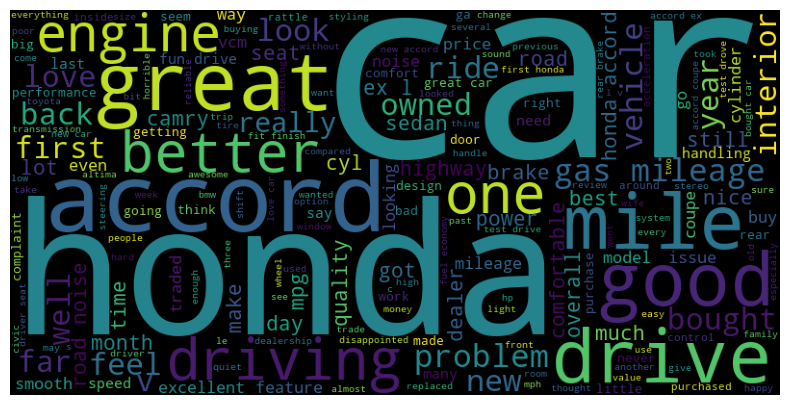

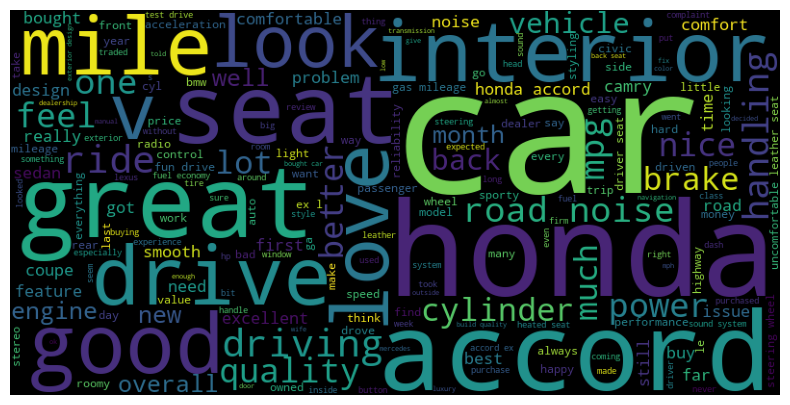

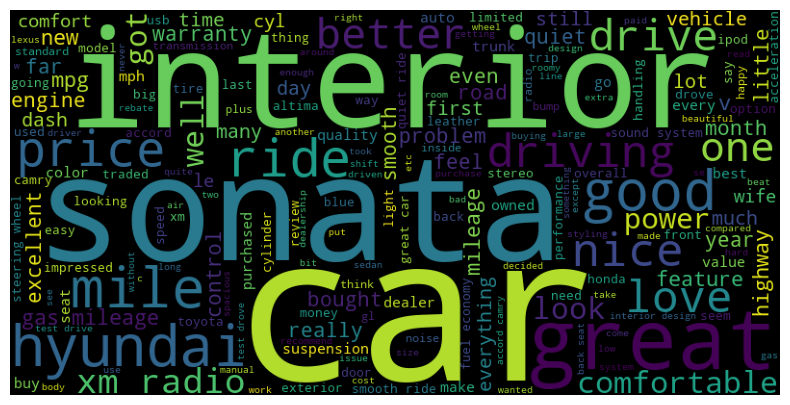

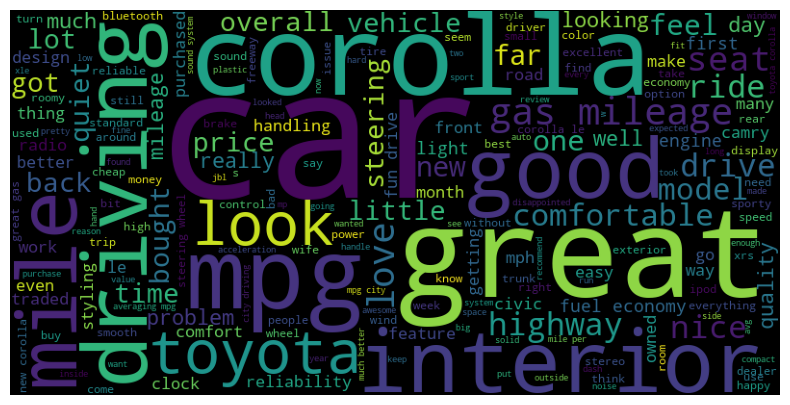

In [58]:
#- e) Create appropriate `wordcloud`s for each part to visualize the most frequent words in the reviews.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# Generate wordclouds for each dataset
# As an example, here's how to do it for the 2008 Honda Accord
generate_wordcloud(' '.join(honda_2008_reviews))
generate_wordcloud(' '.join(honda_2009_reviews))
generate_wordcloud(' '.join(hyundai_2009_reviews))
generate_wordcloud(' '.join(toyota_2009_reviews))

In [ ]:
#- f) Determine the optimal value of k from the set {2, 3, 4, 5} in Question 3.

In [ ]:
#- g) (_optional_) Feel free to obtain any other relevant outputs, such as evaluation metrics or additional plots.

In [ ]:
#- h) (_optional_) If you find that the algorithm used in Question 3 does not provide satisfactory performance, you can try incorporating the datasets `2008_honda_accord` and `2009_honda_accord` to cluster the reviews again, aiming for better results.